In [6]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk') #set plotting context parameters

# The Mean and Standard Deviation

In [7]:
population = np.array([1, 2, 2, 3, 12])

In [8]:
population_mean = population.mean()
print("Population mean: {}".format(population_mean))

Population mean: 4.0


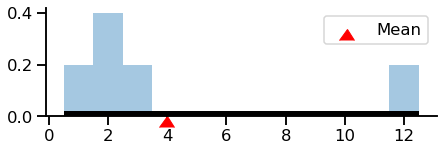

In [10]:
sns.distplot(population, kde=False, norm_hist=True, bins=np.arange(.5, 13, 1.));
# Flexibly plot a univariate distribution of observations.
plt.hlines(0., .5, 12.5, linewidth=10.) #1st 0 is for x; .5 till 12.5 for x
plt.plot(
    [population_mean], [0], marker=6, linestyle='',
    markersize=15, color="red", clip_on=False,
    label='Mean'
);

ax = plt.gca()
ax.spines['top'].set_visible(False) #remove top and right axis of plot
ax.spines['right'].set_visible(False)

plt.legend();

plt.gcf().set_size_inches(7., 2)

#plt.savefig('../img/2_mean.svg', bbox_inches='tight', pad_inches=.1)

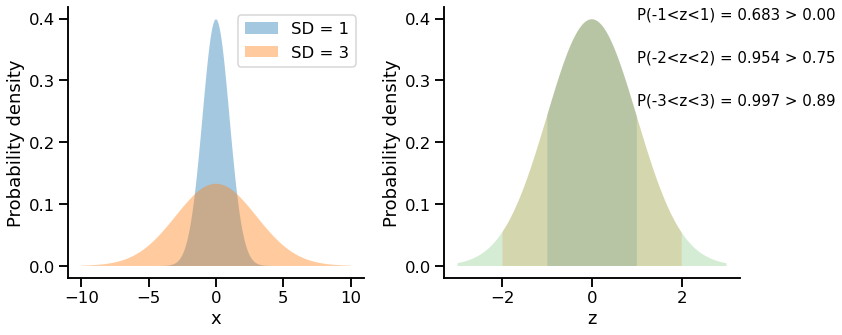

In [11]:
fig = plt.figure(figsize=(12., 5.))

x = np.arange(-10, 10, .01)

n1 = sns.distributions.stats.norm(loc=0, scale=1.) #loc is mean and scale is SD
n2 = sns.distributions.stats.norm(loc=0, scale=3.) #creates a normal continuous random variable

plt.subplot(1, 2, 1)

plt.fill_between(x, n1.pdf(x), alpha=.4, label="SD = 1")
plt.fill_between(x, n2.pdf(x), alpha=.4, label="SD = 3")
plt.xlabel('x')
plt.ylabel('Probability density')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend();

plt.subplot(1, 2, 2);

x= np.arange(-4., 4., .01)

label_string = 'P(-{0}<z<{0}) = {1:5.3f} > {2:4.2f}' #numbers of .format comes within
z = 1
plt.fill_between(x[np.abs(x) < z], n1.pdf(x[np.abs(x) < z]), alpha=.2, label='+/- 1 SD')
plt.annotate(
    label_string.format(z, n1.cdf(z) - n1.cdf(-z), 1 - z**(-2)),
    xy=(1, .4),
    xytext=(1, .4),
    fontsize=15
)

z = 2
plt.fill_between(x[np.abs(x) < z], n1.pdf(x[np.abs(x) < z]), alpha=.2, label='+/- 2 SD')
plt.annotate(
    label_string.format(z, n1.cdf(z) - n1.cdf(-z), 1 - z**(-2)),
    xy=(1, .33),
    xytext=(1, .33),
    fontsize=15
)

z = 3
plt.fill_between(x[np.abs(x) < z], n1.pdf(x[np.abs(x) < z]), alpha=.2, label='+/- 3 SD')
plt.annotate(
    label_string.format(z, n1.cdf(z) - n1.cdf(-z), 1 - z**(-2)),
    xy=(1, .26),
    xytext=(1, .26),
    fontsize=15
)

plt.xlabel('z')
plt.ylabel('Probability density')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();
#plt.savefig('../img/2_SD.svg', bbox_inches='tight', pad_inches=.1)

# Percentiles

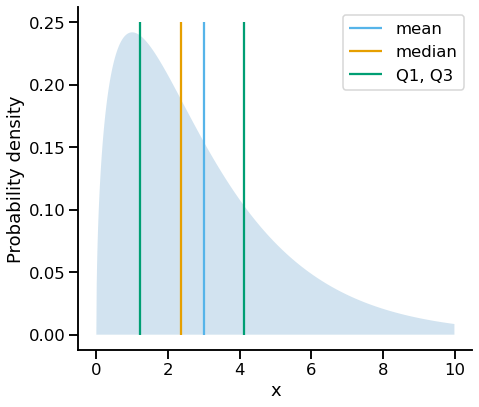

In [14]:
dist = sns.distributions.stats.chi2(3) # a chi-squared continuous random variable

x = np.arange(0., 10., .01)
plt.fill_between(x, dist.pdf(x), alpha=.4) #alpha= color shade

plt.xlabel('x')
plt.ylabel('Probability density')

# mean
plt.vlines(dist.mean(), 0., .25,
           colors='#56B4E9', label='mean')

# median
plt.vlines(dist.median(), 0., .25,
           colors='#E69F00', label='median')

# quartiles
plt.vlines((dist.ppf(.25), dist.ppf(.75)), 0., .25,
           colors='#009E73', label="Q1, Q3");

plt.legend();

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.gcf().set_size_inches(7., 6.)
plt.tight_layout();
#plt.savefig('../img/2_Percentiles.svg', bbox_inches='tight', pad_inches=.1)